In [10]:
%load_ext autoreload
%autoreload 2

import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from generator import RoadNetwork, Trajectory
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import pandas as pd
import networkx as nx
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch_geometric.transforms as T
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
network = RoadNetwork()
network.load("../osm_data/porto")
trajectory = Trajectory("../datasets/trajectories/Porto/road_segment_map_final.csv", nrows=10000000).generate_TTE_datatset()

traj_features = pd.read_csv("../datasets/trajectories/Porto/speed_features_unnormalized.csv")
traj_features.set_index(["u", "v", "key"], inplace=True)
traj_features["util"] = (traj_features["util"] - traj_features["util"].min()) / (traj_features["util"].max() - traj_features["util"].min())  # min max normalization
traj_features["avg_speed"] = (traj_features["avg_speed"] - traj_features["avg_speed"].min()) / (traj_features["avg_speed"].max() - traj_features["avg_speed"].min())  # min max normalization
traj_features.fillna(0, inplace=True)

# data = network.generate_road_segment_pyg_dataset(drop_labels=["highway_enc"])
df = network.generate_road_segment_pyg_dataset(include_coords=True, traj_data=traj_features, return_df=True, one_hot_enc=False)

Pandas Apply:   0%|          | 0/1544234 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1544234 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1544234 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1544234 [00:00<?, ?it/s]

Pandas Apply:   0%|          | 0/1544234 [00:00<?, ?it/s]

(11331, 12)


/tmp/ipykernel_6087/3728987013.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="viridis",


<AxesSubplot:>

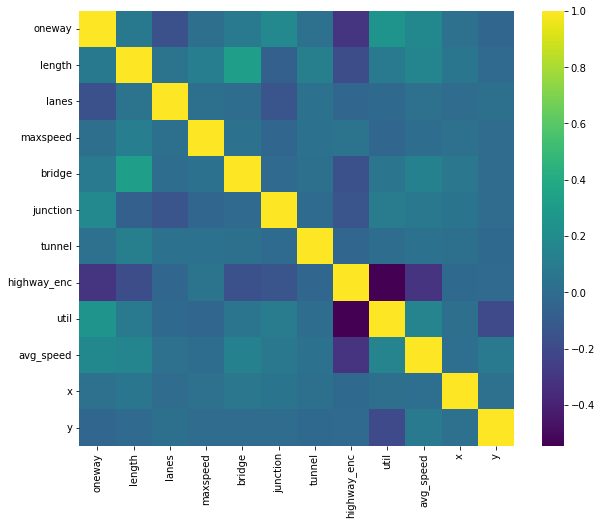

In [23]:
print(df.shape)
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap="viridis",
            square=True, ax=ax)